<a href="https://colab.research.google.com/github/stav-aizik/AI-PROJECT/blob/main/Final%20Project-telsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries and download data

In [1]:
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [2]:
#download data(tesla) from yahoo Finance
tsla = yf.download("TSLA",start="2022-07-04",end="2023-07-04")
tsla.reset_index(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
tsla.columns = [col[0] for col in tsla.columns]

In [4]:
tsla

,Date,Close,High,Low,Open,Volume
0,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100
1,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600
2,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600
3,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200
4,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200
...,...,...,...,...,...,...
246,2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200
247,2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800
248,2023-06-29,257.500000,260.739990,253.610001,258.029999,131283400
249,2023-06-30,261.769989,264.450012,259.890015,260.600006,112267600


In [5]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Close   251 non-null    float64       
 2   High    251 non-null    float64       
 3   Low     251 non-null    float64       
 4   Open    251 non-null    float64       
 5   Volume  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


#Statistical data


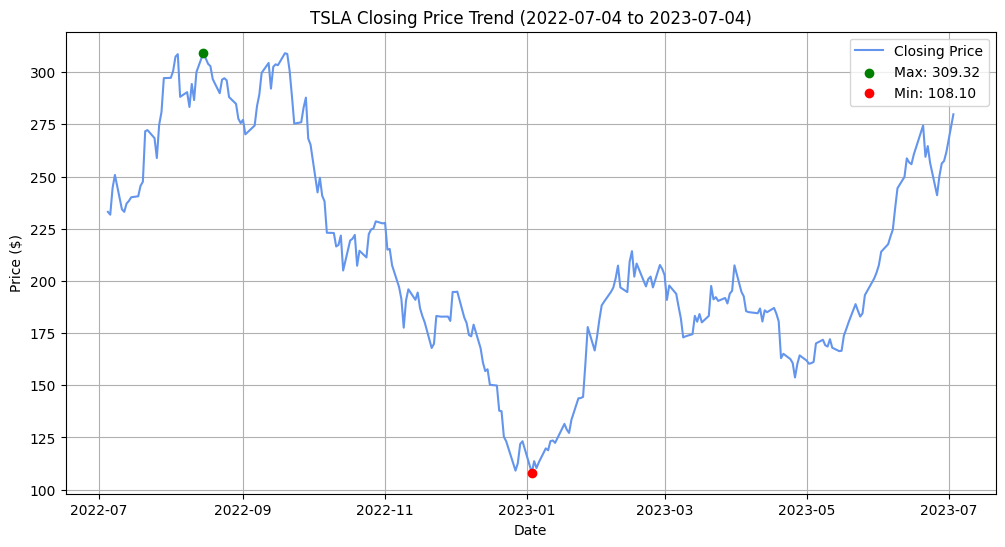

In [6]:
# Find max and min points

max_idx = tsla['Close'].idxmax()
min_idx = tsla['Close'].idxmin()
max_date = tsla.loc[max_idx, 'Date']
min_date = tsla.loc[min_idx, 'Date']
max_price = tsla.loc[max_idx, 'Close']
min_price = tsla.loc[min_idx, 'Close']

# Plotting TSLA closing price over the year

plt.figure(figsize=(12,6))
plt.plot(tsla['Date'], tsla['Close'], label='Closing Price', color='cornflowerblue')
plt.scatter(max_date, max_price, color='green', label=f'Max: {max_price:.2f}', zorder=5)
plt.scatter(min_date, min_price, color='red', label=f'Min: {min_price:.2f}', zorder=5)

plt.title('TSLA Closing Price Trend (2022-07-04 to 2023-07-04)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
#Descriptive statistics
tsla[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,211.335432,216.184940,206.326016,211.425365,1.227532e+08
std,51.943259,52.663119,51.309378,51.967260,4.987700e+07
min,103.000000,111.750000,101.809998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504997,178.474998,8.223405e+07
50%,198.539993,203.000000,192.889999,197.580002,1.166622e+08
75%,250.645004,258.660004,245.939995,253.331665,1.591312e+08
max,311.666656,314.666656,305.579987,309.320007,3.065906e+08


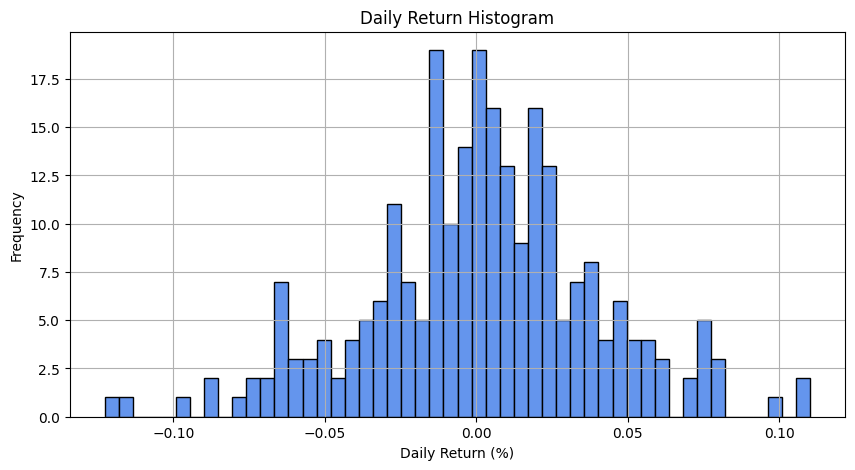

In [8]:
#Daily return histogram
# Calculate daily return
tsla['daily_return'] = tsla['Close'].pct_change()

# Plot histogram of daily returns
plt.figure(figsize=(10,5))
plt.hist(tsla['daily_return'].dropna(), bins=50, color='cornflowerblue', edgecolor='black')
plt.title('Daily Return Histogram')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


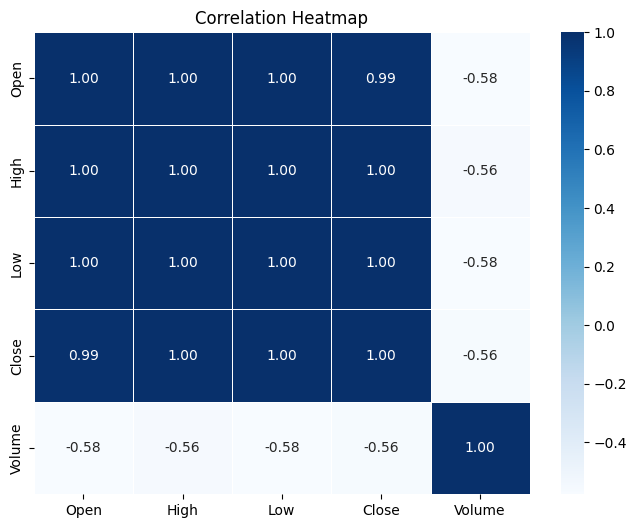

In [9]:
#correlation matrix
correlation_matrix = tsla[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Summary statistics for daily return
tsla['daily_return'].describe()

,daily_return
count,250.000000
mean,0.001466
std,0.038316
min,-0.122422
25%,-0.020107
50%,0.002087
75%,0.022736
max,0.110002


In [11]:
tsla

,Date,Close,High,Low,Open,Volume,daily_return
0,2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,NaN
1,2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,-0.005721
2,2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,0.055279
3,2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,0.025435
4,2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200,-0.065480
...,...,...,...,...,...,...,...
246,2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200,0.038000
247,2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800,0.024100
248,2023-06-29,257.500000,260.739990,253.610001,258.029999,131283400,0.004917
249,2023-06-30,261.769989,264.450012,259.890015,260.600006,112267600,0.016582


#EDA

In [12]:
pd.concat([tsla["Close"],
          tsla["Close"].shift(-1),
          tsla["Close"].shift(+1)],
          keys = ["Close","TMW","Yesterdy"],axis=1).head()

,Close,TMW,Yesterdy
0,233.066666,231.733337,NaN
1,231.733337,244.543335,233.066666
2,244.543335,250.763336,231.733337
3,250.763336,234.343338,244.543335
4,234.343338,233.070007,250.763336


In [13]:
tsla["Close Change"] = (tsla["Close"].shift(-1) - tsla["Close"])

In [14]:
tsla.loc[tsla["Close Change"]>0,"label"]=1
tsla.loc[tsla["Close Change"]<0,"label"] = -1

In [15]:
tsla = tsla.dropna(subset=['Close Change'])

In [16]:
tsla.set_index('Date', inplace=True)

In [17]:
tsla.drop(columns=['Close Change', 'daily_return'], inplace=True, errors='ignore')

<ipython-input-17-2908a0e3638f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla.drop(columns=['Close Change', 'daily_return'], inplace=True, errors='ignore')


In [18]:
tsla

,Close,High,Low,Open,Volume,label
Date,,,,,,
2022-07-05,233.066666,233.146667,216.166672,223.000000,84581100,-1.0
2022-07-06,231.733337,234.563339,227.186661,230.779999,71853600,1.0
2022-07-07,244.543335,245.363327,232.210007,233.919998,81930600,1.0
2022-07-08,250.763336,254.979996,241.160004,242.333328,101854200,-1.0
2022-07-11,234.343338,253.063339,233.626663,252.103333,99241200,-1.0
...,...,...,...,...,...,...
2023-06-26,241.050003,258.369995,240.699997,250.070007,179990600,1.0
2023-06-27,250.210007,250.389999,240.850006,243.240005,164968200,1.0
2023-06-28,256.239990,259.880005,248.889999,249.699997,159770800,1.0


#Classic Models